In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df1=pd.read_csv('/content/drive/MyDrive/enhanced_student_habits_performance_dataset.csv')

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [90]:
df1.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')

In [91]:
#Splitting the table into two different tables table1(student_habits) and table2(student_outcomes)
# Table 1: Academic Outcomes (Performance)
table1 = df1[['student_id', 'gender', 'study_hours_per_day',
                          'social_media_hours','major','part_time_job','attendance_percentage', 'sleep_hours', 'diet_quality',
                          'exercise_frequency', 'internet_quality','mental_health_rating', 'extracurricular_participation', 'previous_gpa', 'stress_level', 'social_activity',
                          'screen_time', 'study_environment', 'access_to_tutoring','family_income_range', 'parental_support_level', 'motivation_level',
                          'exam_anxiety_score','learning_style','time_management_score']].copy()

# Table 2: Academic Outcomes (Performance)
table2 = df1[['student_id', 'exam_score', 'dropout_risk']].copy()

print(" Table 1: Student Profile (Input Features) ")
print(table1.head())
print("-" * 50)
print(" Table 2: Academic Outcomes (Target Variables) ")
print(table2.head(3))
print("-" * 50)

 Table 1: Student Profile (Input Features) 
   student_id  gender  study_hours_per_day  social_media_hours  \
0      100000    Male             7.645367                 3.0   
1      100001    Male             5.700000                 0.5   
2      100002    Male             2.400000                 4.2   
3      100003   Other             3.400000                 4.6   
4      100004  Female             4.700000                 0.8   

              major part_time_job  attendance_percentage  sleep_hours  \
0  Computer Science           Yes                   70.3          6.2   
1              Arts            No                   88.4          7.2   
2              Arts            No                   82.1          9.2   
3        Psychology           Yes                   79.3          4.2   
4          Business           Yes                   62.9          6.5   

  diet_quality  exercise_frequency  ... social_activity  screen_time  \
0         Poor                   3  ...         

In [92]:
# merged two tables table1 and table2 using student_id column using merge.
df = pd.merge(
    table1,
    table2,
    on='student_id',
    how='inner'
)

In [80]:
df.isnull()

,student_id,gender,study_hours_per_day,social_media_hours,major,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,...,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,dropout_risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
df.isnull().sum()

,0
student_id,0
gender,0
study_hours_per_day,0
social_media_hours,0
major,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [94]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        student_id  gender  study_hours_per_day  social_media_hours  \
0          100000    Male             7.645367                 3.0   
1          100001    Male             5.700000                 0.5   
2          100002    Male             2.400000                 4.2   
3          100003   Other             3.400000                 4.6   
4          100004  Female             4.700000                 0.8   
...           ...     ...                  ...                 ...   
79995      179995    Male             3.700000                 2.1   
79996      179996  Female             1.200000                 0.4   
79997      179997  Female             4.100000                 1.6   
79998      179998   Other             3.800000                 0.6   
79999      179999   Other             3.000000                 4.5   

                  major part_time_job  attendance_percentage  sleep_hours  \
0      Computer Science           Yes                   70.3          6.2   
1                  Arts            No                   88.4          7.2   
2                  Arts            No                   82.1          9.2   
3            Psychology           Yes                   79.3          4.2   
4              Business           Yes                   62.9          6.5   
...                 ...           ...                    ...          ...   
79995       Engineering           Yes                   80.8          6.1   
79996          Business            No                   99.5          4.1   
79997              Arts           Yes                   46.1          8.3   
79998           Biology           Yes                   58.7          5.8   
79999       Engineering           Yes                   97.7          5.3   

      diet_quality  exercise_frequency  ...  study_environment  \
0             Poor                   3  ...  Co-Learning Group   
1             Good                   4  ...  Co-Learning Group   
2             Good                   4  ...            Library   
3             Fair                   3  ...  Co-Learning Group   
4             Good                   6  ...         Quiet Room   
...            ...                 ...  ...                ...   
79995         Fair                   0  ...            Library   
79996         Good                   0  ...  Co-Learning Group   
79997         Good                   7  ...               Dorm   
79998         Good                   2  ...         Quiet Room   
79999         Fair                   1  ...  Co-Learning Group   

       access_to_tutoring family_income_range  parental_support_level  \
0                     Yes                High                       9   
1                     Yes                 Low                       7   
2                     Yes                High                       3   
3                     Yes                 Low                       5   
4                     Yes              Medium                       9   
...                   ...                 ...                     ...   
79995                  No                 Low                       1   
79996                  No                 Low                       3   
79997                  No              Medium                       7   
79998                 Yes                 Low                       2   
79999                 Yes              Medium                       1   

       motivation_level  exam_anxiety_score  learning_style  \
0                     7                   8         Reading   
1                     2                  10         Reading   
2                     9                   6     Kinesthetic   
3                     3                  10         Reading   
4                     1                  10         Reading   
...                 ...                 ...             ...   
79995                 4                  10        Auditory   
79996            

In [95]:
df.columns

Index(['student_id', 'gender', 'study_hours_per_day', 'social_media_hours',
       'major', 'part_time_job', 'attendance_percentage', 'sleep_hours',
       'diet_quality', 'exercise_frequency', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'stress_level', 'social_activity', 'screen_time', 'study_environment',
       'access_to_tutoring', 'family_income_range', 'parental_support_level',
       'motivation_level', 'exam_anxiety_score', 'learning_style',
       'time_management_score', 'exam_score', 'dropout_risk'],
      dtype='object')

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.dtypes

,0
student_id,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
major,object
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object
exercise_frequency,int64


In [98]:
import numpy as np

In [99]:
df['screen_to_study_ratio'] = df['social_media_hours'] / df['study_hours_per_day'] #new column
df['screen_to_study_ratio'].replace([np.inf, -np.inf], 0, inplace=True) #handles infinite values
df['net_study_hours'] = df['study_hours_per_day'] - df['social_media_hours'] #new column

/tmp/ipython-input-689508151.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [100]:
# Ordinal Encoding for Target (Dropout Risk)
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['dropout_risk_encoded'] = df['dropout_risk'].map(risk_mapping)

In [101]:
study_hours_per_day = df['study_hours_per_day'].to_numpy()

In [102]:
np.mean(study_hours_per_day)

np.float64(4.174388185869909)

In [103]:
np.min(study_hours_per_day)

np.float64(0.0)

In [104]:
np.max(study_hours_per_day)

np.float64(12.0)

In [105]:
df['extracurricular_encoded'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})

In [106]:
df

,student_id,gender,study_hours_per_day,social_media_hours,major,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,...,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,dropout_risk,screen_to_study_ratio,net_study_hours,dropout_risk_encoded,extracurricular_encoded
0,100000,Male,7.645367,3.0,Computer Science,Yes,70.3,6.2,Poor,3,...,7,8,Reading,3.0,100,No,0.392395,4.645367,NaN,1
1,100001,Male,5.700000,0.5,Arts,No,88.4,7.2,Good,4,...,2,10,Reading,6.0,99,No,0.087719,5.200000,NaN,0
2,100002,Male,2.400000,4.2,Arts,No,82.1,9.2,Good,4,...,9,6,Kinesthetic,7.6,98,No,1.750000,-1.800000,NaN,1
3,100003,Other,3.400000,4.6,Psychology,Yes,79.3,4.2,Fair,3,...,3,10,Reading,3.2,100,No,1.352941,-1.200000,NaN,1
4,100004,Female,4.700000,0.8,Business,Yes,62.9,6.5,Good,6,...,1,10,Reading,7.1,98,No,0.170213,3.900000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,179995,Male,3.700000,2.1,Engineering,Yes,80.8,6.1,Fair,0,...,4,10,Auditory,5.3,88,No,0.567568,1.600000,NaN,0
79996,179996,Female,1.200000,0.4,Business,No,99.5,4.1,Good,0,...,2,10,Kinesthetic,6.8,52,No,0.333333,0.800000,NaN,1
79997,179997,Female,4.100000,1.6,Arts,Yes,46.1,8.3,Good,7,...,1,10,Visual,1.3,89,No,0.390244,2.500000,NaN,1
79998,179998,Other,3.800000,0.6,Biology,Yes,58.7,5.8,Good,2,...,8,7,Kinesthetic,3.7,96,No,0.157895,3.200000,NaN,1


In [107]:
df = pd.get_dummies(df, columns=['major', 'gender'], drop_first=True)

In [108]:
print(df[['study_hours_per_day', 'social_media_hours', 'exam_score', 'net_study_hours']].describe().T.applymap(lambda x: f'{x:,.2f}'))

                         count   mean    std    min    25%    50%     75%  \
study_hours_per_day  80,000.00   4.17   2.00   0.00   2.80   4.13    5.50   
social_media_hours   80,000.00   2.50   1.45   0.00   1.20   2.50    3.80   
exam_score           80,000.00  89.14  11.59  36.00  82.00  93.00  100.00   
net_study_hours      80,000.00   1.67   2.47  -5.00  -0.06   1.60    3.40   

                        max  
study_hours_per_day   12.00  
social_media_hours     5.00  
exam_score           100.00  
net_study_hours       11.30  


/tmp/ipython-input-2797996323.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [109]:
# Correlation Matrix
corr_matrix = df[['study_hours_per_day', 'social_media_hours', 'mental_health_rating',
                      'net_study_hours', 'exam_score']].corr()

In [110]:
corr_matrix

,study_hours_per_day,social_media_hours,mental_health_rating,net_study_hours,exam_score
study_hours_per_day,1.000000,-0.001322,-0.000224,0.811326,0.241460
social_media_hours,-0.001322,1.000000,0.000555,-0.585666,-0.006351
mental_health_rating,-0.000224,0.000555,1.000000,-0.000506,0.010556
net_study_hours,0.811326,-0.585666,-0.000506,1.000000,0.199429
exam_score,0.241460,-0.006351,0.010556,0.199429,1.000000


In [111]:
# Correlation with Exam Score
print(corr_matrix[['exam_score']].sort_values(by='exam_score', ascending=False))

                      exam_score
exam_score              1.000000
study_hours_per_day     0.241460
net_study_hours         0.199429
mental_health_rating    0.010556
social_media_hours     -0.006351


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

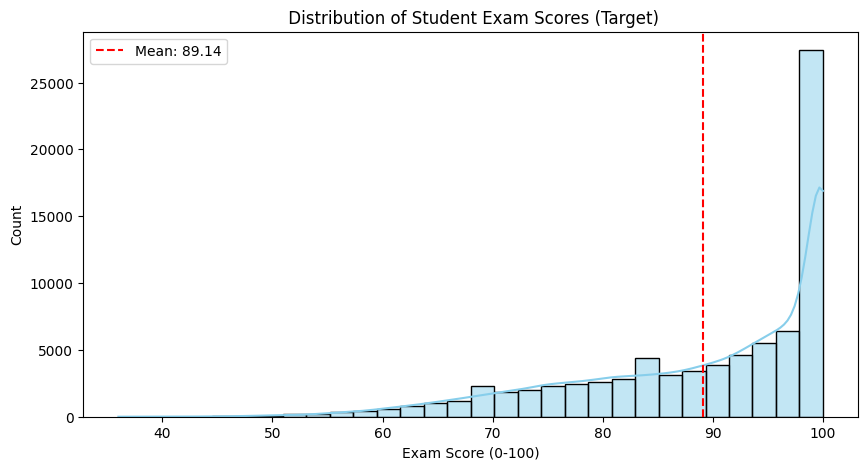

In [113]:
# Visualization 1: Distribution of the Target Variable
plt.figure(figsize=(10, 5))
sns.histplot(df['exam_score'], bins=30, kde=True, color='skyblue')
plt.title(' Distribution of Student Exam Scores (Target)')
plt.xlabel('Exam Score (0-100)')
plt.axvline(df['exam_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["exam_score"].mean():.2f}')
plt.legend()
plt.show()

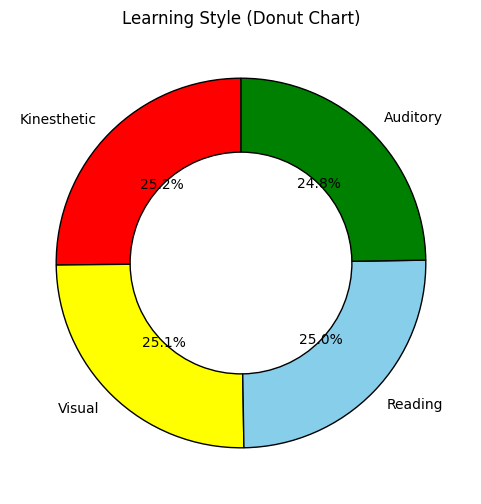

In [114]:
# Create a donut chart for learning style distribution
plt.figure(figsize=(6,6))
values = df['learning_style'].value_counts()
labels = values.index

# Pie chart with a hole in the center
plt.pie( values, labels=labels, autopct='%1.1f%%',startangle=90, colors=['red','yellow','skyblue','green'],
    wedgeprops={'width':0.4, 'edgecolor':'black'}  # makes the hole
)
plt.title('Learning Style (Donut Chart)')
plt.show()

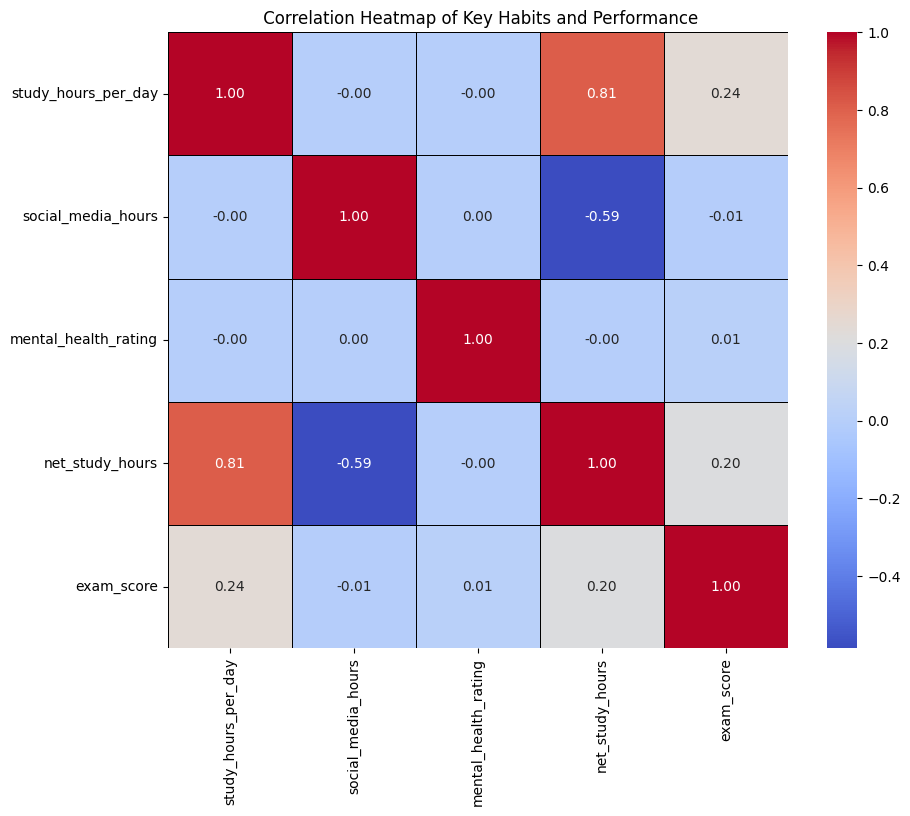

In [115]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title(' Correlation Heatmap of Key Habits and Performance')
plt.show()

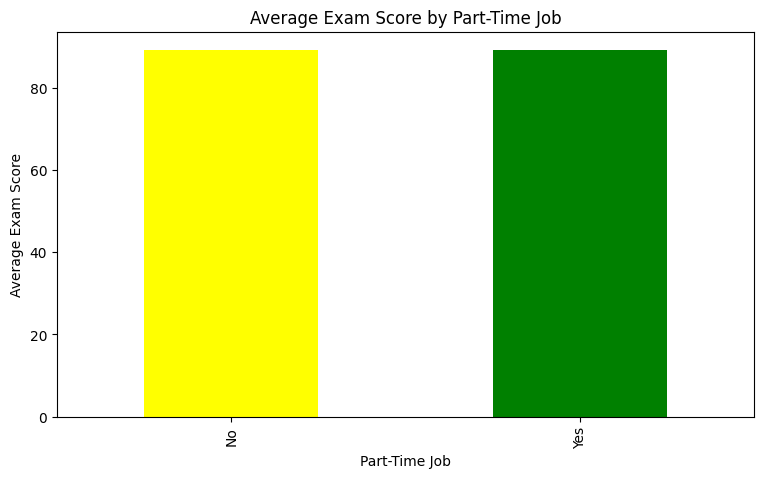

In [116]:
# 2. Bar Chart: Average Exam Score by Part-Time Job
plt.figure(figsize=(9,5))
df.groupby('part_time_job')['exam_score'].mean().plot(kind='bar', color=['yellow','green'])
plt.title('Average Exam Score by Part-Time Job')
plt.xlabel('Part-Time Job')
plt.ylabel('Average Exam Score')
plt.show()

In [117]:
import plotly.express as px

In [118]:
fig = px.histogram(
    df,
    x='exam_score',
    nbins=20,
    title='Exam Score Distribution',
    color_discrete_sequence=['#4C78A8']
)
fig.update_layout(bargap=0.1)
fig.show()

In [119]:
fig = px.pie(
    df,
    names='learning_style',
    title='learning style (Donut Chart)',
    hole=0.55,  # donut style
    color_discrete_sequence=['#8da0cb','#fc8d62']
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [120]:
corr = corr_matrix.select_dtypes('number').corr()
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Heatmap'
)
fig.show()

In [121]:
fig = px.bar(
    df.groupby('part_time_job')['exam_score'].mean().reset_index(),
    x='part_time_job', y='exam_score',
    title='Average Exam Score by Part-Time Job',
    color='part_time_job',
    color_discrete_sequence=['#FDD835', '#66BB6A']
)
fig.show()

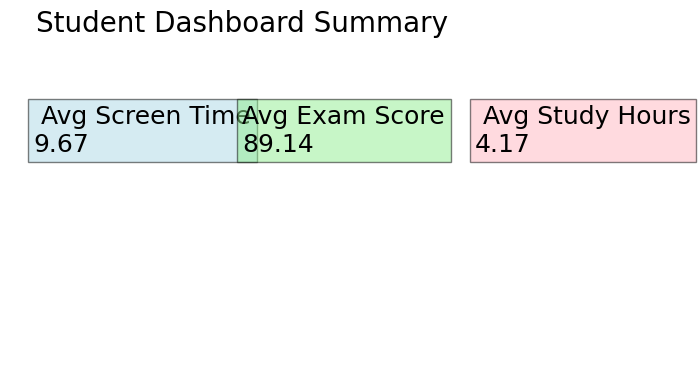

In [122]:
total_students = len(df)
avg_score = df['exam_score'].mean()
avg_study = df['study_hours_per_day'].mean()
avg_screen=df['screen_time'].mean()

# Create a blank canvas
fig, ax = plt.subplots(figsize=(6,4))
ax.axis('off')

# Add cards (text boxes)
ax.text(0.05, 0.7, f" Avg Screen Time\n{avg_screen:.2f}", fontsize=18, bbox=dict(facecolor='lightblue', alpha=0.5))
#f" Total Students\n{total_students}"- Text displayed (supports new line)
ax.text(0.5, 0.7, f"Avg Exam Score\n{avg_score:.2f}", fontsize=18, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.text(1.0, 0.7, f" Avg Study Hours\n{avg_study:.2f}", fontsize=18, bbox=dict(facecolor='lightpink', alpha=0.5))

plt.title("Student Dashboard Summary", fontsize=20, pad=20)
plt.show()


In [123]:
# 1. Save the Student habits table
table1.to_csv('table1.csv',
                  index=False)

# 2. Save the Academic Outcomes table
table2.to_csv('table2.csv',
                   index=False)